In [1]:
from defillama2 import DefiLlama
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:,.4f}'.format

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.style.use("fivethirtyeight")

# Makes graphs crisp. Only use if you don't have a lot of points/lines on your graph.
%config InlineBackend.figure_formats = ['svg', 'retina'] # use svg, then retina if svg is not supported

In [2]:
def human_format_dollar_or_num(dollar=False, decimals=0):
    """ 
    Return a function for formatting matplot axis numbers human friendly. 

    Parameters
    ----------
    dollar: logical
        If True, will add $ in front of the numbers.
    decimals: int
        Number of decimals to display.
    """

    base_fmt = '%.{}f%s'.format(decimals)
    if dollar:
        base_fmt = '$' + base_fmt

    def human_format(num, pos): # pos is necessary as it'll be used by matplotlib
        magnitude = 0
        while abs(num) >= 1000:
            magnitude += 1
            num /= 1000.0
        return base_fmt % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])
    return human_format

## Create a DefiLlama instance

In [3]:
obj = DefiLlama()

## Get historical DeFi TVL on all chains

In [4]:
df = obj.get_defi_hist_tvl()
df.tail()

,tvl
date,
2022-11-10,"61,584,403,709.4580"
2022-11-11,"64,110,231,623.5235"
2022-11-12,"62,844,265,713.6489"
2022-11-13,"60,785,071,032.8389"
2022-11-14,"60,780,543,548.5916"


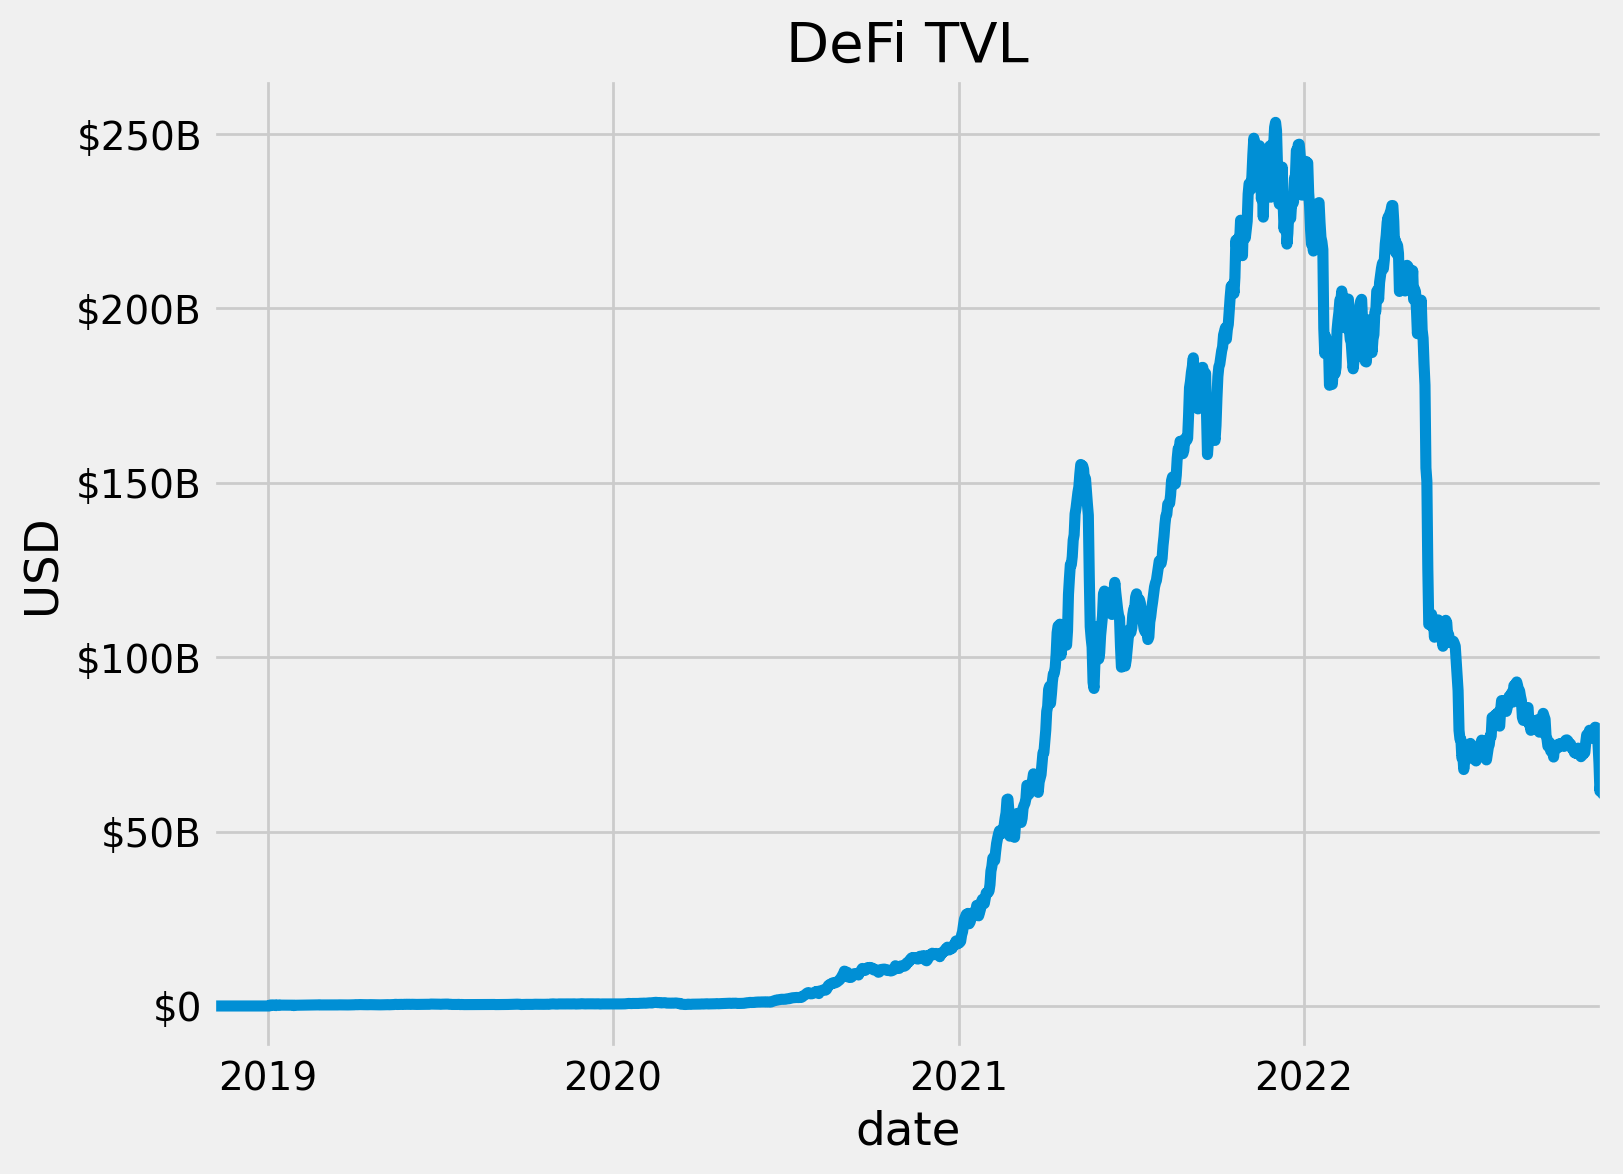

In [5]:
ax = df.tvl.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=0))
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("DeFi TVL");

## Get historical TVL of a chain

In [6]:
df = obj.get_chain_hist_tvl('Arbitrum')
df.tail()

,tvl
date,
2022-11-10,"905,415,060.9732"
2022-11-11,"949,100,083.0247"
2022-11-12,"951,587,492.6470"
2022-11-13,"928,191,249.3196"
2022-11-14,"928,191,210.6710"


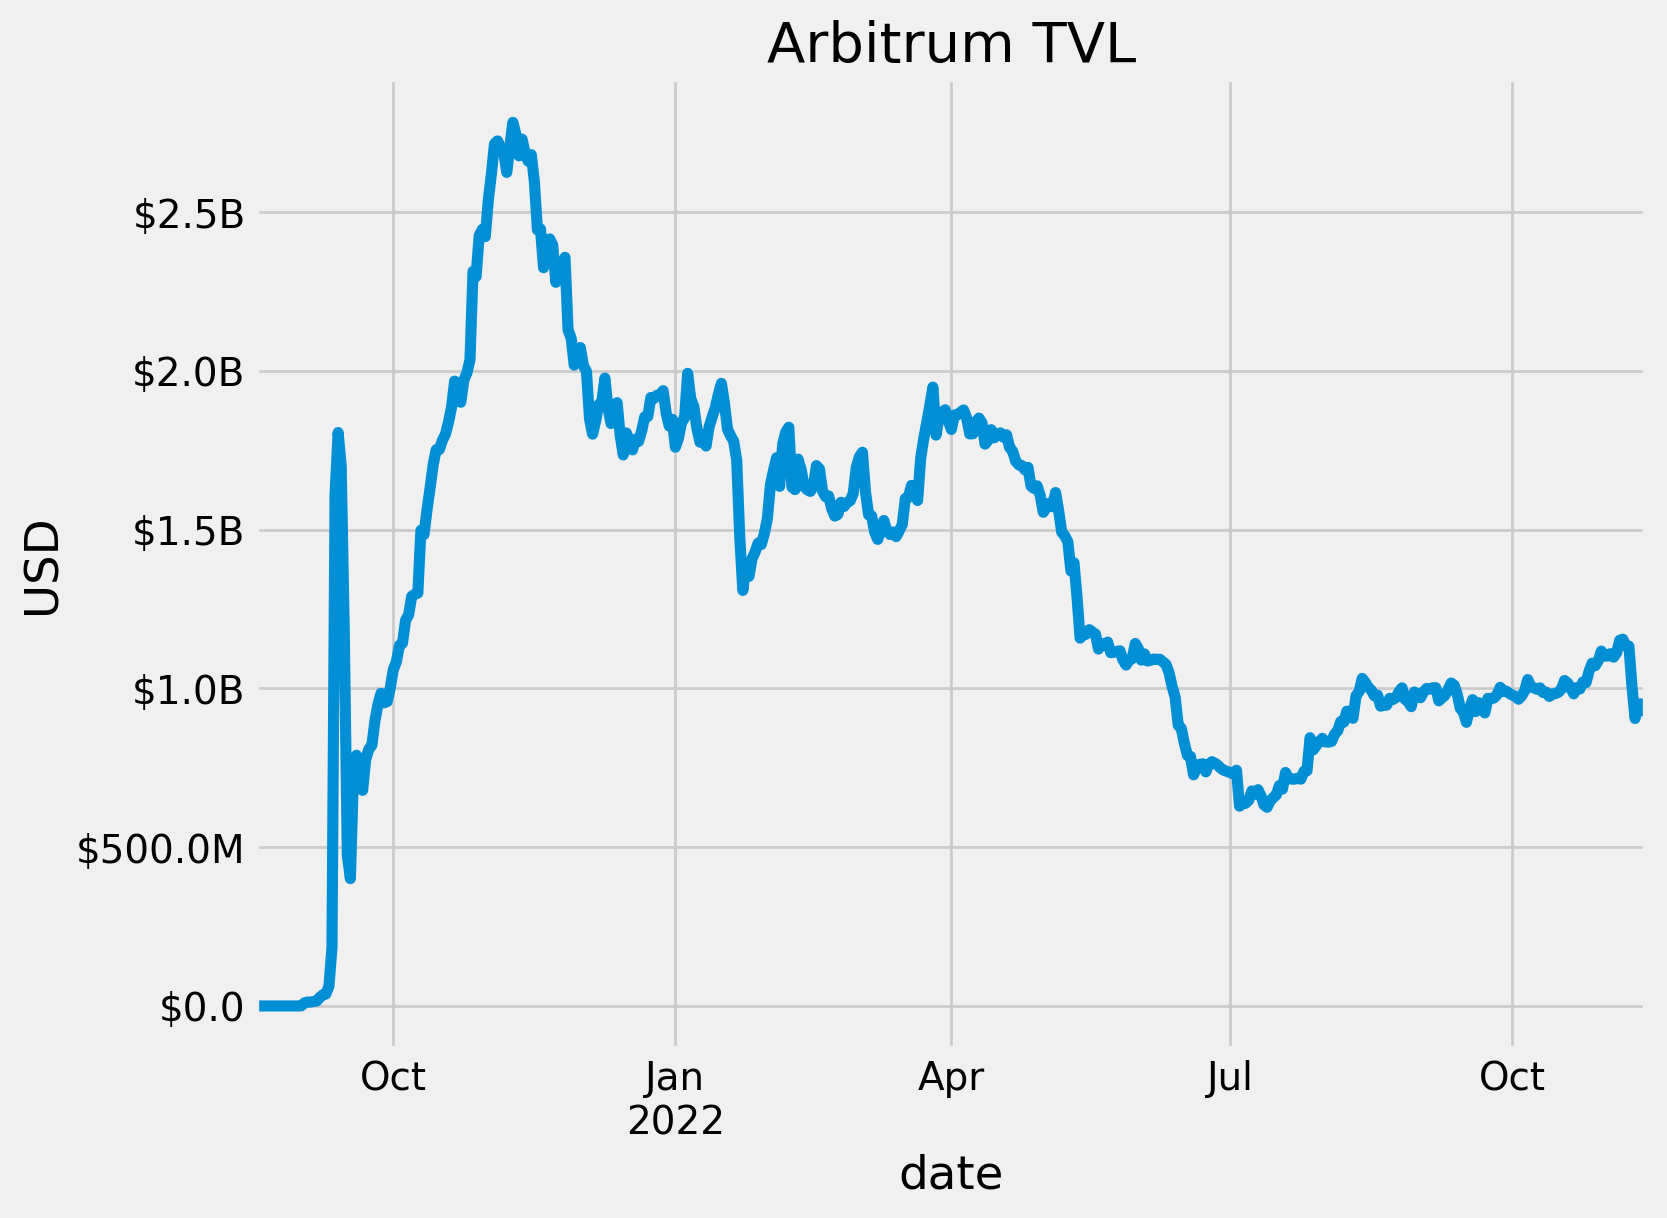

In [7]:
ax = df.tvl.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=1))
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("Arbitrum TVL");

## Get current TVL of all chains

In [8]:
df = obj.get_chains_curr_tvl()

# print top 20 chains by tvl
df = df.sort_values('tvl', ascending=False) 
df.head(20)

,token,tvl
chain,,
Ethereum,ETH,"39,841,574,514.3732"
Binance,BNB,"6,338,813,856.4533"
Tron,TRON,"4,136,301,860.4293"
Polygon,MATIC,"1,268,846,625.8928"
Avalanche,AVAX,"1,118,656,136.5734"
Arbitrum,None,"917,728,021.3614"
Optimism,OP,"721,537,791.4936"
Cronos,CRO,"670,728,624.9184"
Solana,SOL,"591,754,880.4267"


## Get current TVL of a protocol

In [9]:
obj.get_protocol_curr_tvl('gmx')

423310789.45774347

In [10]:
obj.get_protocol_curr_tvl('premia')

7035723.943788691

In [11]:
obj.get_protocol_curr_tvl('gns')

{'message': 'Protocol is not in our database'}

In [12]:
# but it doesn't always work, for example, can't pull AAVE
obj.get_protocol_curr_tvl('aave')

{'message': 'Protocol is not in our database'}

## Get current TVL of a protocol broken down by chain

In [13]:
df = obj.get_protocol_curr_tvl_by_chain('gmx')
df

,tvl
Avalanche,"51,979,476.2073"
Avalanche-staking,"13,785,366.4900"
Arbitrum-staking,"254,476,094.8100"
Arbitrum,"371,331,313.2505"


In [14]:
# the current TVL can be obtained by summing the non-staking values
abs(df[~df.index.str.contains('staking')].sum() - obj.get_protocol_curr_tvl('gmx')) < 0.1

tvl    True
dtype: bool

In [15]:
df = obj.get_protocol_curr_tvl_by_chain('premia')
df

,tvl
Optimism,"1,095,753.9567"
Binance,"9,344.8420"
Ethereum,"1,804,956.9022"
Ethereum-staking,"3,179,241.9487"
Arbitrum,"3,105,428.9583"
Fantom,"1,020,239.2845"


In [16]:
# the current TVL can be obtained by summing the non-staking values
abs(df[~df.index.str.contains('staking')].sum() - obj.get_protocol_curr_tvl('premia')) < 0.1

tvl    True
dtype: bool

In [17]:
# let's get AAVE's current TVL
df = obj.get_protocol_curr_tvl_by_chain('aave')
df[~df.index.str.contains('staking')].sum()

tvl   9,264,888,129.9270
dtype: float64

## Get historical TVL of a protocol by chain

In [18]:
dd = obj.get_protocol_hist_tvl_by_chain('gmx')

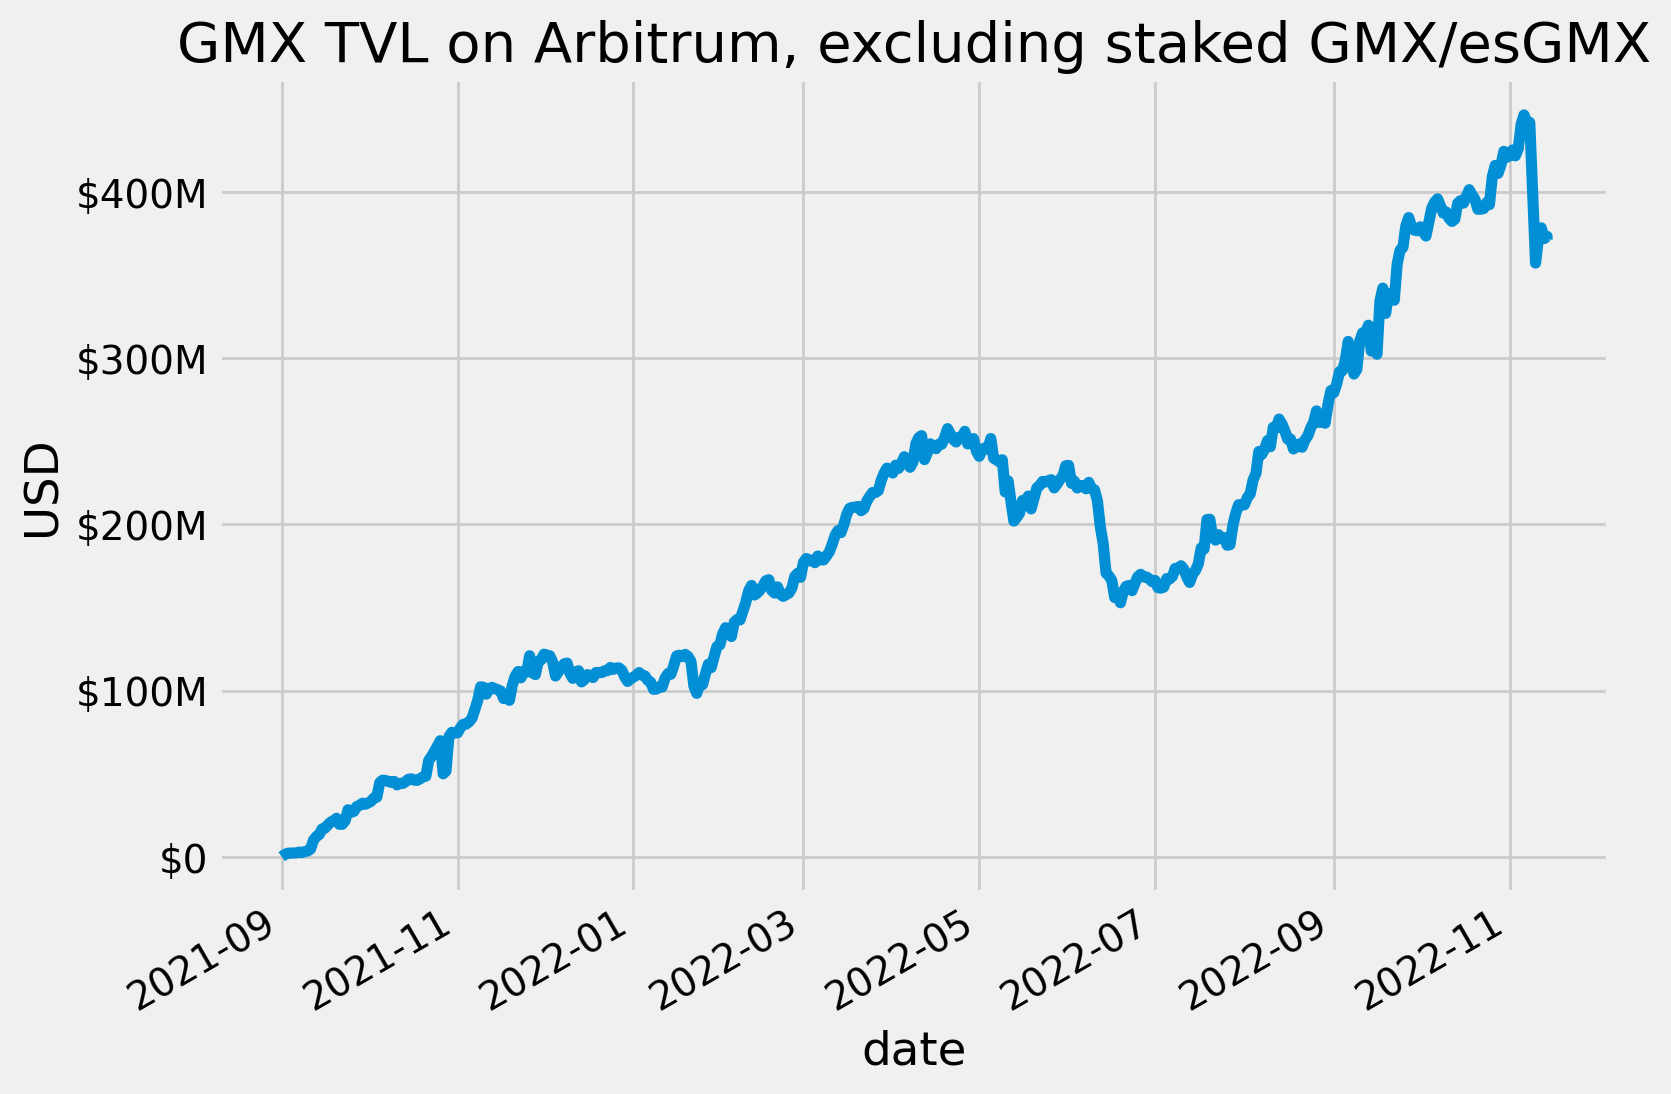

In [19]:
ax = dd['Arbitrum'].tvl.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=0))
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("GMX TVL on Arbitrum, excluding staked GMX/esGMX");

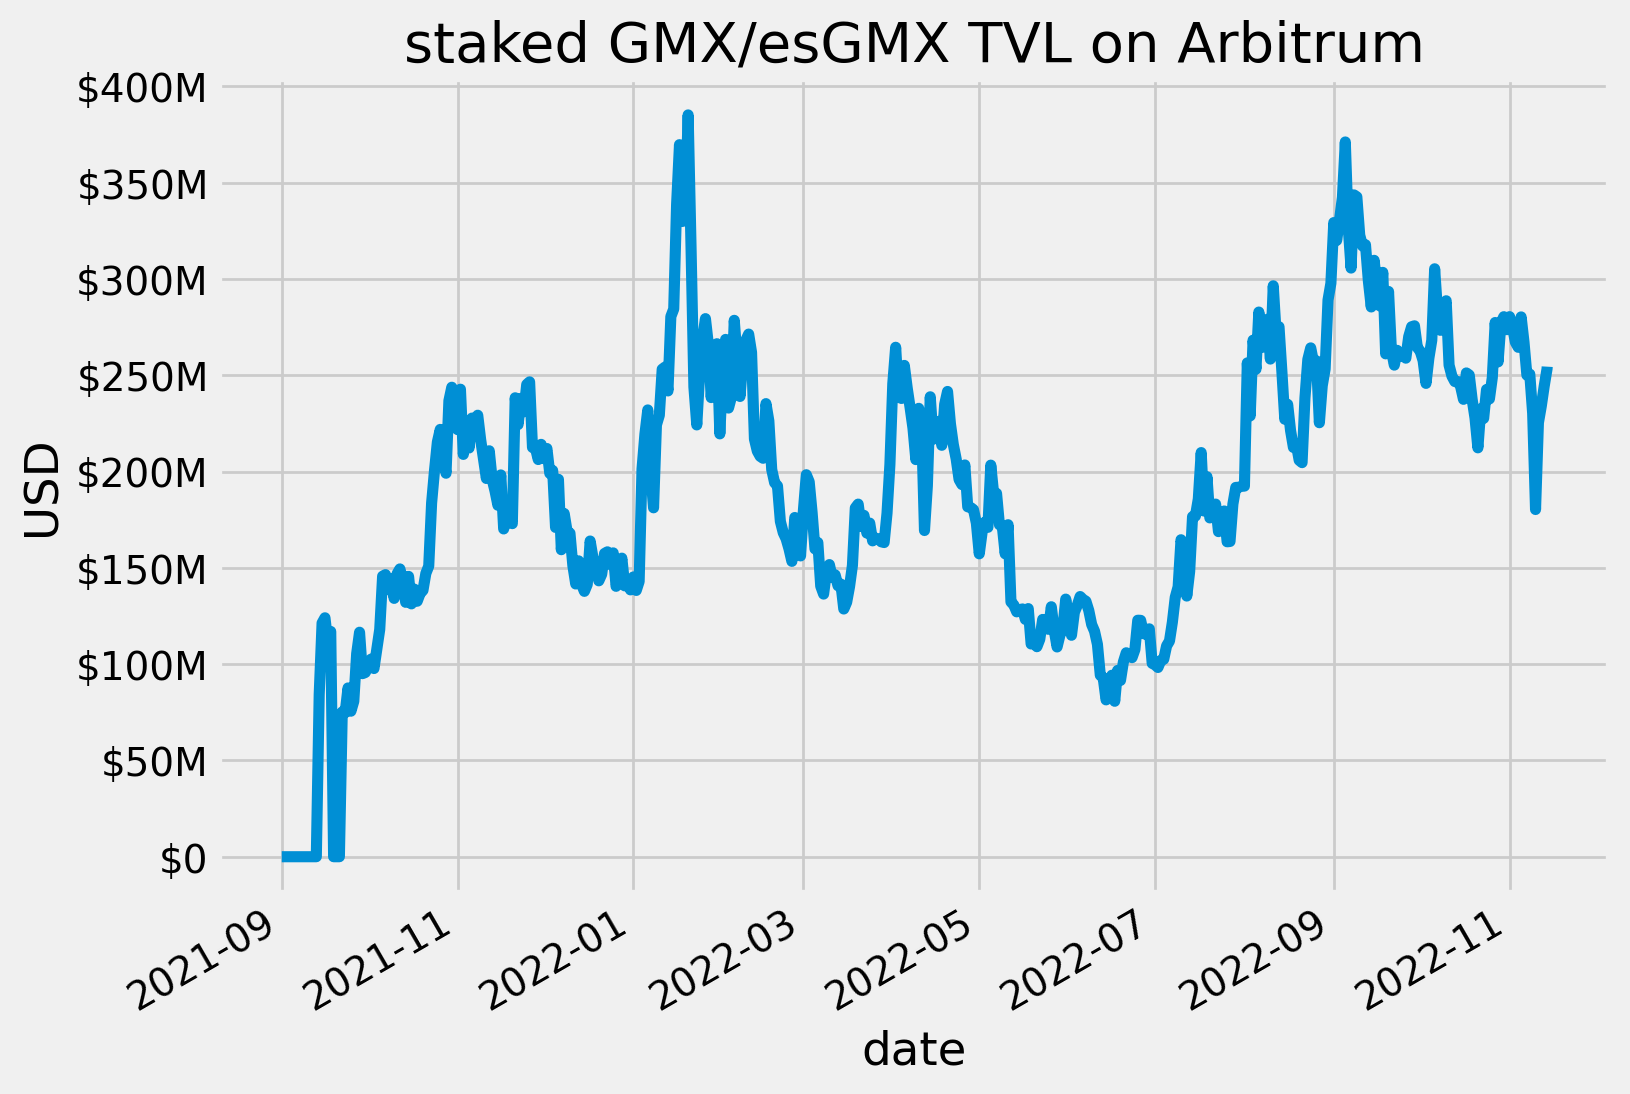

In [20]:
ax = dd['Arbitrum-staking'].tvl.plot()
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("staked GMX/esGMX TVL on Arbitrum");

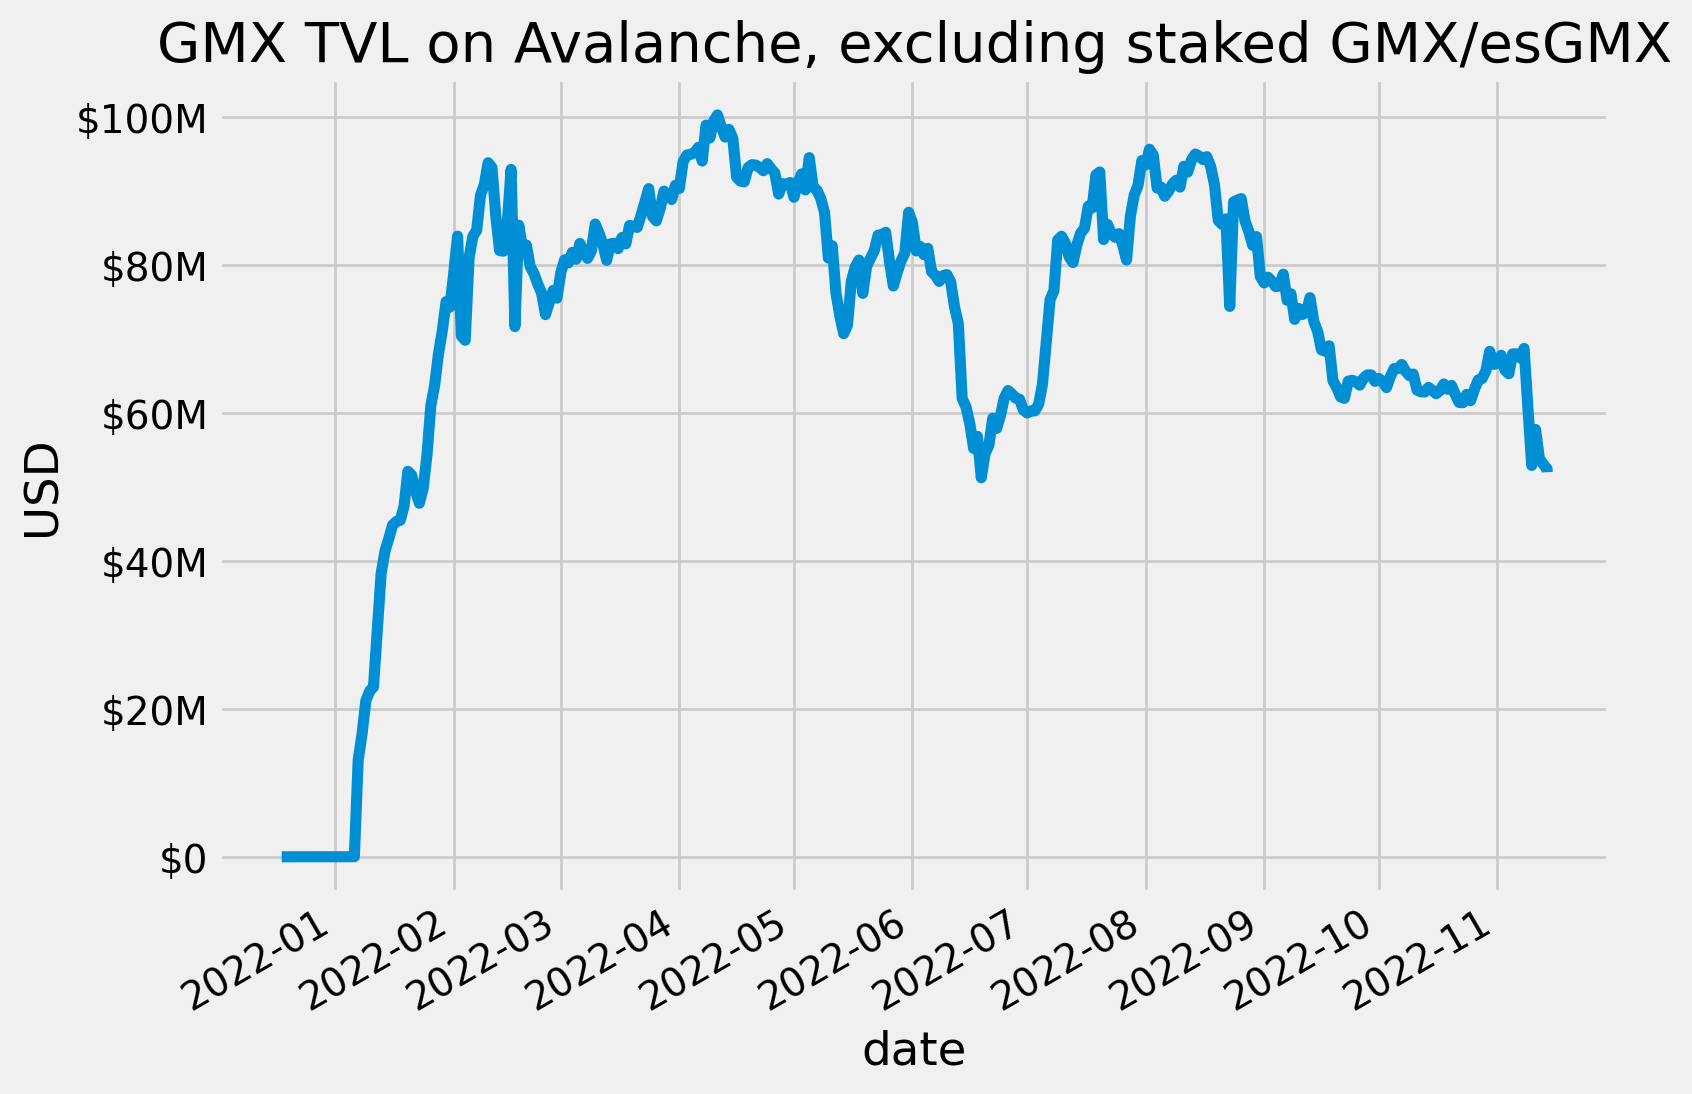

In [21]:
ax = dd['Avalanche'].tvl.plot()
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("GMX TVL on Avalanche, excluding staked GMX/esGMX");

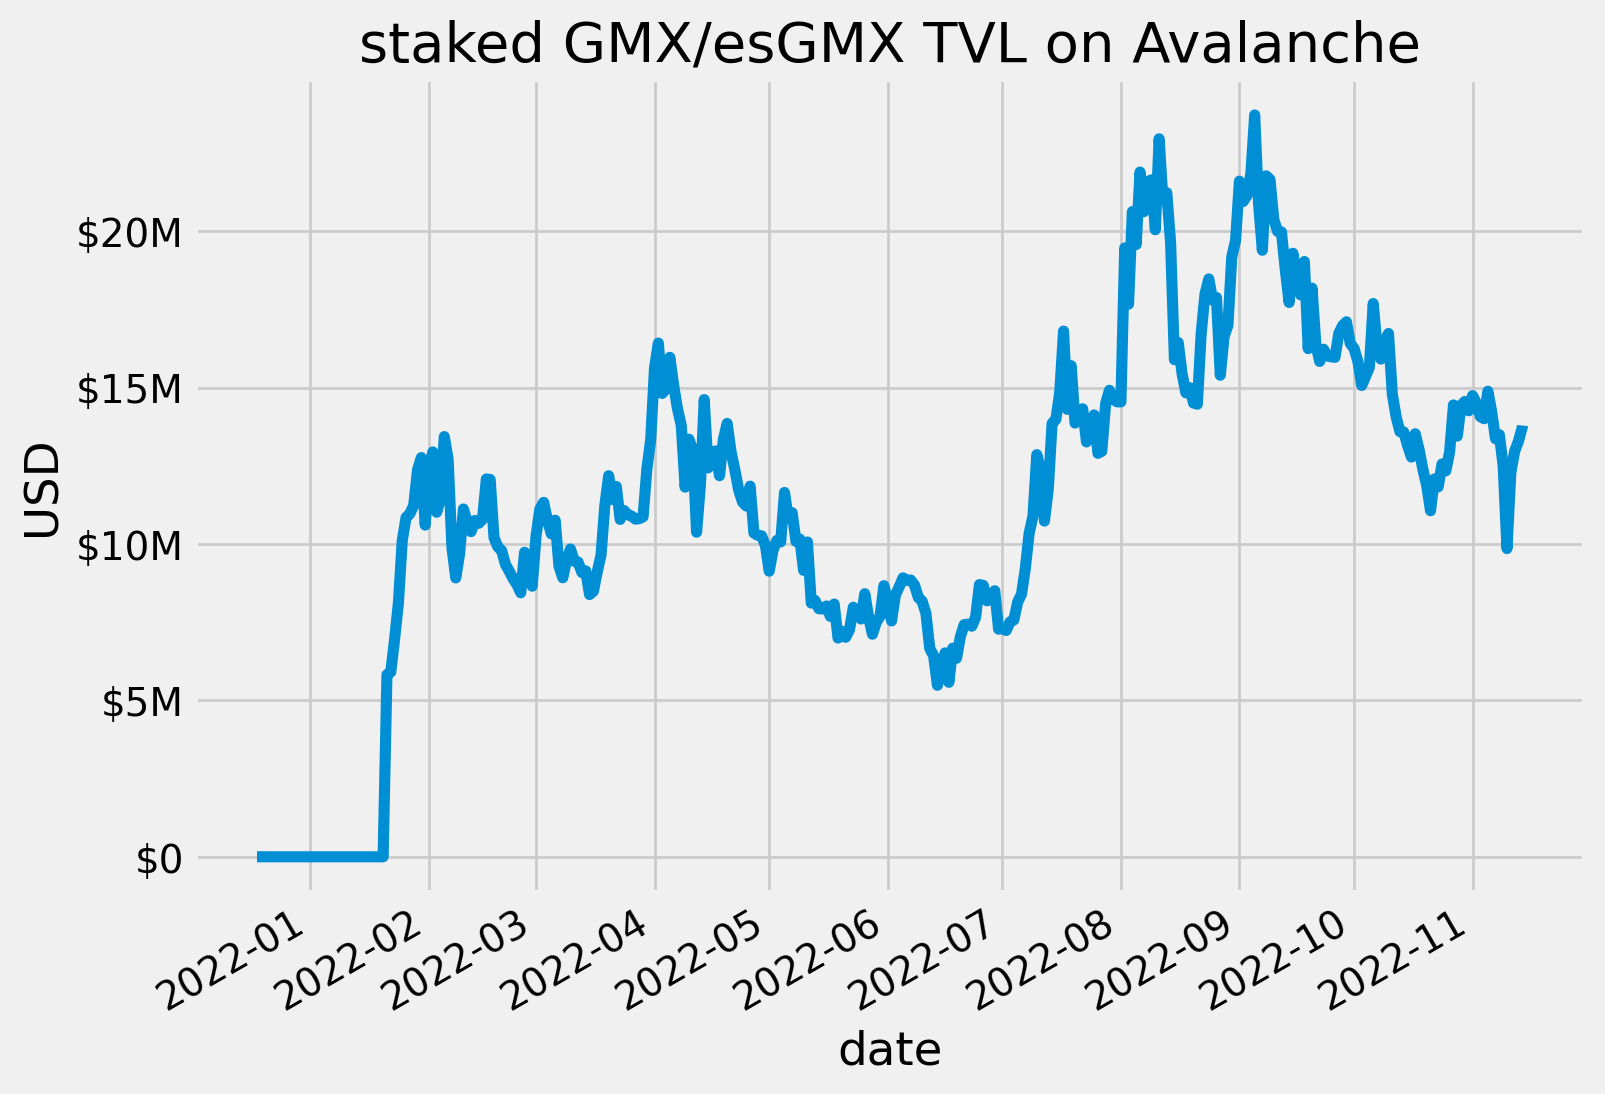

In [22]:
ax = dd['Avalanche-staking'].tvl.plot()
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("staked GMX/esGMX TVL on Avalanche");

## Get fundamentals for all protocols

In [23]:
df = obj.get_protocols_fundamentals()
df = df.sort_values('tvl', ascending=False, ignore_index=True)
df.head(10)

,name,symbol,chain,category,chains,tvl,change_1d,change_7d,fdv,mcap,forked_from
0,Binance CEX,-,Multi-Chain,CEX,"[Ethereum, Binance, Tron, Bitcoin]","64,391,731,758.7847",-2.9962,NaN,NaN,NaN,[]
1,MakerDAO,MKR,Ethereum,CDP,[Ethereum],"6,670,766,284.5271",-2.3187,-16.9455,"667,378,959.0000","598,179,913.0000",NaN
2,Polygon Bridge & Staking,MATIC,Polygon,Chain,[Polygon],"6,534,305,303.0175",-5.7967,-19.7273,"8,719,007,576.0000","7,732,661,727.0000",NaN
3,Lido,LDO,Multi-Chain,Liquid Staking,"[Ethereum, Solana, Moonbeam, Moonriver, Terra]","5,804,399,095.3498",-3.8248,-23.8756,"1,010,021,039.0000","758,681,833.0000",NaN
4,OKX,-,Multi-Chain,CEX,"[Ethereum, Bitcoin, Tron, Arbitrum, Polygon, A...","5,690,379,171.6277",NaN,NaN,NaN,NaN,[]
5,Bitfinex,-,Multi-Chain,CEX,"[Bitcoin, Ethereum, Tron, Polygon, EOS, Algora...","5,300,472,924.3280",NaN,NaN,NaN,NaN,[]
6,AAVE V2,AAVE,Multi-Chain,Lending,"[Ethereum, Polygon, Avalanche]","3,883,437,862.0258",0.5274,-11.3935,"914,863,346.0000","810,057,365.0000",NaN
7,WBTC,WBTC,Ethereum,Bridge,[Ethereum],"3,839,676,740.6134",-3.9881,-25.2370,"3,851,744,221.0000","3,851,744,221.0000",NaN
8,Curve,CRV,Multi-Chain,Dexes,"[Ethereum, Polygon, Arbitrum, Optimism, Fantom...","3,703,834,139.2814",-2.5539,-37.3307,"2,101,029,923.0000","402,716,474.0000",NaN
9,PancakeSwap,CAKE,Multi-Chain,Dexes,"[Binance, Ethereum, Aptos]","3,002,617,816.8201",7.2151,-7.2809,"2,973,930,183.0000","582,991,632.0000",[Uniswap]


In [24]:
# find the 5 protocols with the biggest % jump in TVL in last 7 days
df.sort_values('change_7d', ascending=False, ignore_index=True).head(5)

,name,symbol,chain,category,chains,tvl,change_1d,change_7d,fdv,mcap,forked_from
0,Debets,-,Polygon,Prediction Market,[Polygon],"116,289.8369",217.0609,908.8973,NaN,NaN,[]
1,Maple,MPL,Multi-Chain,Undercollateralized Lending,"[Ethereum, Solana]","135,762,808.5704",15.8507,837.1373,"82,239,589.0000","56,398,032.0000",NaN
2,Stakerz,-,Kava,Yield Aggregator,[Kava],229.0902,-0.5771,494.7304,NaN,NaN,[Beefy]
3,ExinPool,-,Mixin,Staking,[Mixin],"7,007,792.6200",-1.1634,453.5128,NaN,NaN,[]
4,Silo Finance,SILO,Ethereum,Lending,[Ethereum],"2,586,241.4399",-1.1057,164.8772,"39,619,587.0000","7,130,978.0000",[]


In [25]:
# derive other metrics
ha = (df.loc[:, ['name', 'category', 'tvl', 'fdv', 'mcap']]
        .assign(mcap_per_tvl = df.mcap / df.tvl, fdv_per_tvl = df.fdv / df.tvl)
     )
ha          

,name,category,tvl,fdv,mcap,mcap_per_tvl,fdv_per_tvl
0,Binance CEX,CEX,"64,391,731,758.7847",NaN,NaN,NaN,NaN
1,MakerDAO,CDP,"6,670,766,284.5271","667,378,959.0000","598,179,913.0000",0.0897,0.1000
2,Polygon Bridge & Staking,Chain,"6,534,305,303.0175","8,719,007,576.0000","7,732,661,727.0000",1.1834,1.3343
3,Lido,Liquid Staking,"5,804,399,095.3498","1,010,021,039.0000","758,681,833.0000",0.1307,0.1740
4,OKX,CEX,"5,690,379,171.6277",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2092,KawaiiSwap,Yield,0.0000,NaN,NaN,NaN,NaN
2093,Louverture,Yield,0.0000,"16,219.7900",0.0000,NaN,inf
2094,Wisteria Swap,Yield,0.0000,NaN,0.0000,NaN,NaN
2095,AgarthaDAO,Reserve Currency,0.0000,NaN,0.0000,NaN,NaN


In [26]:
# aggregate by category
ha.groupby('category')[['tvl', 'fdv', 'mcap']].sum()

,tvl,fdv,mcap
category,,,
Algo-Stables,"982,406,635.9896","1,040,639,275,183.2100","263,748,700.6000"
Bridge,"8,706,996,705.4080","4,861,304,359.0000","4,351,878,091.0000"
CDP,"8,766,677,949.6868","2,500,512,292.0000","1,009,680,237.0000"
CEX,"83,761,849,960.9744",0.0000,0.0000
Chain,"6,842,888,739.7830","9,338,231,411.0000","8,208,626,714.0000"
Cross Chain,"650,414,129.4469","715,666,276.0000","248,679,884.0000"
Derivatives,"1,180,052,631.9006","11,949,258,121,879.0000","976,865,690.0000"
Dexes,"17,685,705,126.4146","25,461,420,201.4500","11,336,458,777.4700"
Exotic Options,"6,209,056.2051",0.0000,0.0000
